# <span style='color:green;font-family:Georgia'>CODE FOR KMEANS CLUSTERING ALGORITHM USING ELBOW POINT METHOD </span>

**1) IMPORTING REQUIRED LIBRARY**

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from kneed import KneeLocator

**2.) READING THE CGPA.csv FILE FROM THE LOCAL SYSTEM USING pandas**

In [50]:
file_location = "C:\\Users\\Ashwin Chafale\\Desktop\\kmeans algo with elbow point\\CGPA.csv" # Download the CGPA.csv file and replace this String variable with the file location of the downloaded CGPA.csv .
df = pd.read_csv(file_location)
arr = np.array(df['CGPA'])
arr

array([ 9.1 ,  9.2 ,  8.2 ,  8.  ,  8.2 ,  5.9 ,  9.05,  8.9 ,  8.  ,
        6.9 ,  8.2 ,  8.1 , 10.  ,  9.5 ,  7.9 ,  5.3 ,  6.5 ,  9.3 ,
        8.2 ,  9.8 ,  8.8 ,  6.6 ,  9.5 ,  7.8 ,  8.  ,  9.9 , 10.  ,
        6.8 ,  7.6 ,  7.8 ,  8.64,  9.56,  8.99,  9.25,  9.1 ,  5.65,
        5.95,  6.65,  7.36])

**3.) PLOTTING THE CGPA OF THE STUDENTS**

Text(0.5, 0, 'CGPA VALUE')

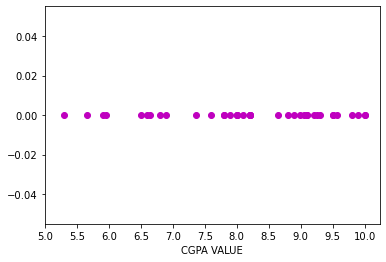

In [51]:
y = np.zeros(len(arr))
plt.scatter(arr,y,color = 'm')
plt.xticks(np.arange(5, 10.5, .5))
plt.xlabel('CGPA VALUE')

**4.) SUM OF THE SQAURED ERROR FOR K VALUES RANGING FROM 1 TO 10 .**

In [52]:
k_range = range(1,11)
inertias = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['CGPA']])
    inertias.append(km.inertia_)
y = np.zeros(len(inertias))
inertias

[62.78975897435896,
 19.27132240259741,
 6.10024375,
 3.855219391025642,
 1.8559790476190472,
 1.301984603174602,
 0.9283388888888879,
 0.7289466666666656,
 0.564879999999999,
 0.3851499999999994]

**5.) PLOTING THIS SUM OF THE SQUARED ERROR AND K VALUES ON THE GRAPH**

([<matplotlib.axis.XTick at 0x25cab087d90>,
 <a list of 9 Text major ticklabel objects>)

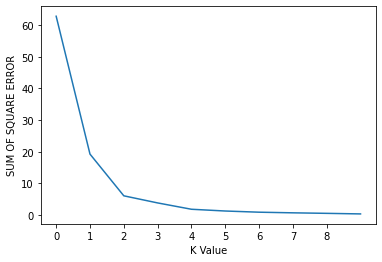

In [53]:
plt.plot(inertias)
plt.xlabel('K Value')
plt.ylabel('SUM OF SQUARE ERROR')
plt.xticks(np.arange(0, 9, 1))

**6.) USING KNEED LIBRARY TO FIND THE ELBOW POINT FROM THE GRAPH**

In [54]:
kn = KneeLocator(k_range, inertias, curve='convex', direction='decreasing')
elbow_point = kn.knee - 1
elbow_point

2

**7.) RUNNING KMEANS ALGO ON THE CGPA DATASET OF THE STUDENTS USING sklearn LIBRARY.**

In [55]:
# elbow_point = 3  (for experiment purpose you can change the value of elbow point manually and see the output)
km = KMeans(n_clusters = elbow_point)
y_predicted = km.fit_predict(df[['CGPA']])
y_predicted


array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

**8.) CREATING A NEW LABEL NAME 'cluster' AND EACH DATASET BELONG TO ONE OF THE CLUSTER .**

In [56]:
df['cluster']=y_predicted
df

,Name,CGPA,cluster
0,KAUSHAL AGARWAL,9.10,1
1,ADARSH PANIKAR,9.20,1
2,LAKSHAY HIRANI,8.20,1
3,SIDDHANT HADA,8.00,1
4,SUDHANSHU KUMAR,8.20,1
5,KALYAN PILLI,5.90,0
6,KUNAL GUPTA,9.05,1
7,SARTHAK SINGHAL,8.90,1
8,YASH SALUJA,8.00,1
9,NITIN KAUSHIK,6.90,0


**9.) PRINTING ARRAY CONTAINING THE RESPECTIVE CLUSTER CENTROIDS**

In [57]:
km.cluster_centers_

array([[6.47363636],
       [8.82107143]])

**10.) PLOTTING THE CLUSTERS AND THEIR CENTRIOD USING matplotlib LIBRARY**

([<matplotlib.axis.XTick at 0x25cab10f370>,
 <a list of 11 Text major ticklabel objects>)

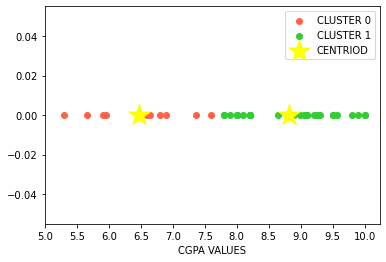

In [58]:
color = ['tomato','limegreen','midnightblue','blueviolet', 'g', 'r', 'c', 'm', 'wheat', 'k']
for i in range(elbow_point):
    df0 = df[df.cluster == i]
    y = np.zeros(len(df0['CGPA']))
    plt.scatter(df0.CGPA,y,color = color[i],label = 'CLUSTER ' + str(i))
y = np.zeros(len(km.cluster_centers_))   
plt.scatter(km.cluster_centers_[:],y,color = 'yellow',marker = '*',label = 'CENTRIOD',s = 500)
plt.legend()
plt.xlabel("CGPA VALUES")
plt.xticks(np.arange(5, 10.5, .5))